In [1]:
## We  must predict the sales for each department in each store.
## markdowns are known to affect sales, but it is challenging to predict which departments are affected and the extent of the impact.

In [2]:
## Import Libraries

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
#from lofo import LOFOImportance # https://github.com/aerdem4/lofo-importance
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from datetime import datetime
import math
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

In [4]:
os.getcwd()

'C:\\Users\\SUNITA'

In [5]:
os.chdir("F:\\WALMART-SALESFORECAST")

## Read CSV file from Pandas

In [6]:
stores_df=pd.read_csv("stores.csv",na_values=[""," ","NA","N/A"])

In [7]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [8]:
stores_df.shape

(45, 3)

In [9]:
stores_df.info

<bound method DataFrame.info of     Store Type    Size
0       1    A  151315
1       2    A  202307
2       3    B   37392
3       4    A  205863
4       5    B   34875
5       6    A  202505
6       7    B   70713
7       8    A  155078
8       9    B  125833
9      10    B  126512
10     11    A  207499
11     12    B  112238
12     13    A  219622
13     14    A  200898
14     15    B  123737
15     16    B   57197
16     17    B   93188
17     18    B  120653
18     19    A  203819
19     20    A  203742
20     21    B  140167
21     22    B  119557
22     23    B  114533
23     24    A  203819
24     25    B  128107
25     26    A  152513
26     27    A  204184
27     28    A  206302
28     29    B   93638
29     30    C   42988
30     31    A  203750
31     32    A  203007
32     33    A   39690
33     34    A  158114
34     35    B  103681
35     36    A   39910
36     37    C   39910
37     38    C   39690
38     39    A  184109
39     40    A  155083
40     41    A  196321
41

In [10]:
stores_df['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [11]:
stores_df['Type'].nunique()

3

In [12]:
os.chdir("F:\\WALMART-SALESFORECAST\\train.csv")

In [13]:
train_df=pd.read_csv("train.csv")

In [14]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [15]:
train_df.shape

(421570, 5)

In [16]:
train_df['Dept'].nunique()

81

In [17]:
train_df.count()

Store           421570
Dept            421570
Date            421570
Weekly_Sales    421570
IsHoliday       421570
dtype: int64

In [18]:
train_df['Store'].nunique()

45

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [20]:
os.chdir("F:\\WALMART-SALESFORECAST\\test.csv")

In [21]:
test_df=pd.read_csv("test.csv")

In [22]:
test_df.head(3)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False


In [23]:
test_df.shape

(115064, 4)

In [24]:
test_df['Store'].nunique()


45

In [25]:
test_df['Dept'].nunique()

81

In [26]:
os.chdir("F:\\WALMART-SALESFORECAST\\features.csv")

In [27]:
features_df=pd.read_csv("features.csv")

In [28]:
features_df1=features_df.copy()

In [29]:
features_df1.head(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False


In [30]:
features_df.shape

(8190, 12)

In [31]:
features_df.head(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False


In [32]:
## MAke date as date time

In [33]:
features_df['Date']=pd.to_datetime(features_df['Date'])


#stores_df['Date']=pd.to_datetime(stores_df['Date'])

In [34]:
train_df['Date']=pd.to_datetime(train_df['Date'])

In [35]:
test_df['Date']=pd.to_datetime(test_df['Date'])

In [36]:
stores_df['Date']=pd.to_datetime(test_df['Date'])

In [37]:
train_df.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False


In [38]:
print(train_df[0:1].Date, train_df[-1:].Date)

0   2010-02-05
Name: Date, dtype: datetime64[ns] 421569   2012-10-26
Name: Date, dtype: datetime64[ns]


In [39]:
## Merge all train data into one dataframe

In [40]:
train_df_new=train_df.merge(features_df,how="left",on=["Store","Date","IsHoliday"])

In [41]:
# Merge all test data into one dataframe

In [42]:
test_df_new=test_df.merge(features_df,how="left",on=["Store","Date","IsHoliday"])

In [43]:
train_df_new.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106


In [44]:
train_df_new.shape

(421570, 14)

In [45]:
test_df_new.head(3)

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573


In [46]:
test_df_new.shape

(115064, 13)

In [47]:
stores_df.head(3)

,Store,Type,Size,Date
0,1,A,151315,2012-11-02
1,2,A,202307,2012-11-09
2,3,B,37392,2012-11-16


In [48]:
## final merging with the stores data

In [49]:
train_df_new1=train_df_new.merge(stores_df,how="left",on=["Store","Date"])

In [50]:
train_df_new1.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,NaN,NaN
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,NaN,NaN
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,NaN,NaN


In [51]:
train_df_new2=train_df_new1.copy

In [52]:
train_df_new1.shape

(421570, 16)

In [53]:
test_df_new1=test_df_new.merge(stores_df,how="left",on=["Store","Date"])

In [54]:
test_df_new1.head(5)

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315.0
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,NaN,NaN
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,NaN,NaN
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,NaN,NaN
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,NaN,NaN


In [55]:
test_df_new1.shape

(115064, 15)

In [56]:
train_df_new1.columns.tolist()

['Store',
 'Dept',
 'Date',
 'Weekly_Sales',
 'IsHoliday',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'Type',
 'Size']

In [57]:
train_df_new1.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                   float64
dtype: object

In [58]:
test_df_new1.columns.tolist()

['Store',
 'Dept',
 'Date',
 'IsHoliday',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'Type',
 'Size']

In [59]:
test_df_new1.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                   float64
dtype: object

In [60]:
## Convert IsHoliday Bollean values to 1 and 0 IN TRAIN DATAFRAME

In [61]:
import numpy as np

In [62]:
train_df_new1['IsHoliday']=np.where(train_df_new1['IsHoliday']==True,1,0)

In [63]:
train_df_new1.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,NaN,NaN
1,1,1,2010-02-12,46039.49,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,NaN,NaN
2,1,1,2010-02-19,41595.55,0,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,NaN,NaN
3,1,1,2010-02-26,19403.54,0,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,NaN,NaN
4,1,1,2010-03-05,21827.90,0,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,NaN,NaN
5,1,1,2010-03-12,21043.39,0,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,NaN,NaN
6,1,1,2010-03-19,22136.64,0,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,NaN,NaN
7,1,1,2010-03-26,26229.21,0,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,NaN,NaN
8,1,1,2010-04-02,57258.43,0,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,NaN,NaN
9,1,1,2010-04-09,42960.91,0,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,NaN,NaN


In [64]:
#train_df_new4=train_df_new1.drop('IsHoliday',axis=1)

In [65]:
## Merge Is Holiday from features dataframe

In [66]:
#train_df_new4.head(3)

In [67]:
#train_df_new5=train_df_new4.merge(features_df,how="left",on=["Store","Date"])

In [68]:
#train_df_new5.head(3)

In [69]:
## Convert IsHoliday Bollean values to 1 and 0 IN Test DATAFRAME

In [70]:
test_df_new1['IsHoliday']=np.where(test_df_new1['IsHoliday']==True,1,0)

In [71]:
test_df_new1.head(5)

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,0,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315.0
1,1,1,2012-11-09,0,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,NaN,NaN
2,1,1,2012-11-16,0,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,NaN,NaN
3,1,1,2012-11-23,1,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,NaN,NaN
4,1,1,2012-11-30,0,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,NaN,NaN


In [72]:
 ## Checking for null values

In [73]:
train_df_new1.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type            421570
Size            421570
dtype: int64

In [74]:
## null value percentage

In [75]:
a1=(train_df_new1.isnull().sum()/train_df_new1.shape[0])*100
a1

Store             0.000000
Dept              0.000000
Date              0.000000
Weekly_Sales      0.000000
IsHoliday         0.000000
Temperature       0.000000
Fuel_Price        0.000000
MarkDown1        64.257181
MarkDown2        73.611025
MarkDown3        67.480845
MarkDown4        67.984676
MarkDown5        64.079038
CPI               0.000000
Unemployment      0.000000
Type            100.000000
Size            100.000000
dtype: float64

In [76]:
## Replace the NaN values in markdown with 0

In [77]:
train_df_new2=train_df_new1.fillna(0)

In [78]:
train_df_new2.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [79]:
train_df_new2.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                int32
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                     int64
Size                   float64
dtype: object

In [80]:
train_df_new2.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,0.0
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,0.0
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,0.0
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,0.0
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,0.0
5,1,1,2010-03-12,21043.39,0,57.79,2.667,0.0,0.0,0.0,0.0,0.0,211.380643,8.106,0,0.0
6,1,1,2010-03-19,22136.64,0,54.58,2.720,0.0,0.0,0.0,0.0,0.0,211.215635,8.106,0,0.0
7,1,1,2010-03-26,26229.21,0,51.45,2.732,0.0,0.0,0.0,0.0,0.0,211.018042,8.106,0,0.0
8,1,1,2010-04-02,57258.43,0,62.27,2.719,0.0,0.0,0.0,0.0,0.0,210.820450,7.808,0,0.0
9,1,1,2010-04-09,42960.91,0,65.86,2.770,0.0,0.0,0.0,0.0,0.0,210.622857,7.808,0,0.0


###### Step2:Data Exploration

In [81]:
train_df_new2.describe()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.0,421570.0
mean,22.200546,44.260317,15981.258123,0.070358,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,0.0,0.0
std,12.785297,30.492054,22711.183519,0.255750,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.0,0.0
min,1.000000,1.000000,-4988.940000,0.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,0.0,0.0
25%,11.000000,18.000000,2079.650000,0.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,0.0,0.0
50%,22.000000,37.000000,7612.030000,0.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,0.0,0.0
75%,33.000000,74.000000,20205.852500,0.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,0.0,0.0
max,45.000000,99.000000,693099.360000,1.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,0.0,0.0


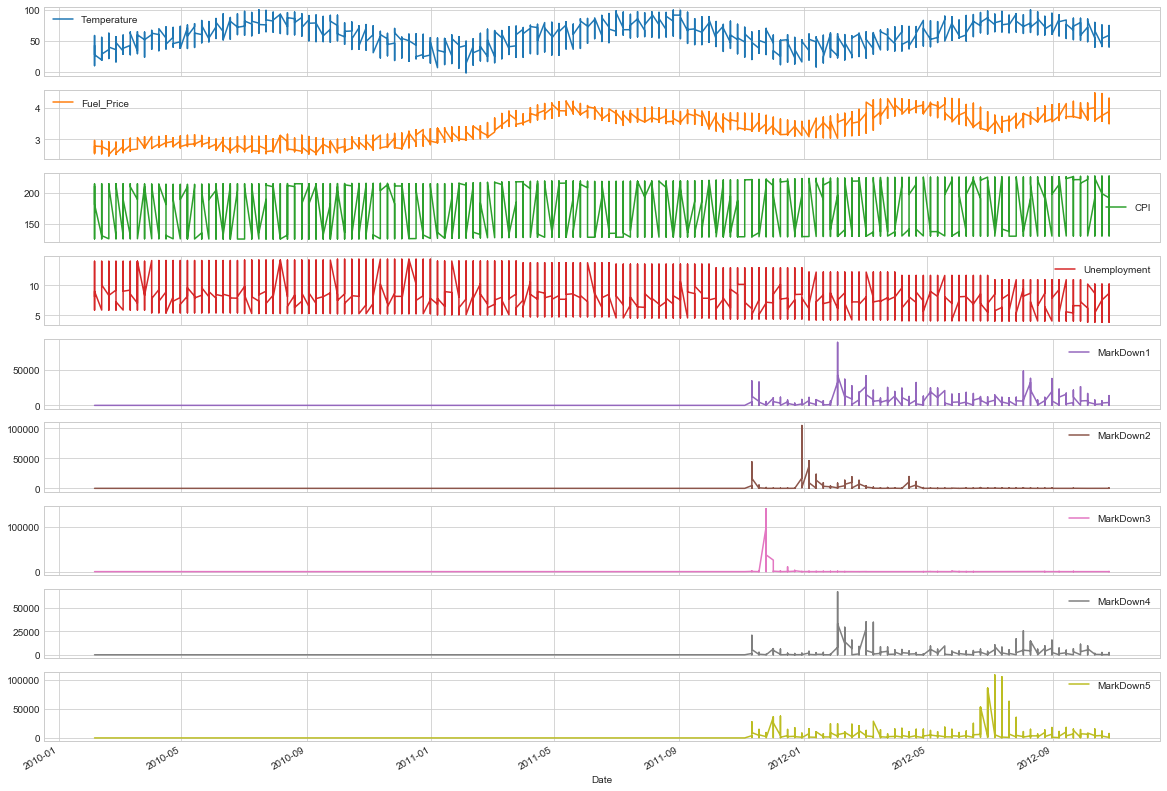

In [82]:
# Plots for the different features in the df: 
train_df_new2[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date', subplots=True, figsize=(20,15))

plt.show()

## Fuel price has risen considerably over period of time.

## Temp descent seasonality

## CPI is more or less constant over period of time.
## Unemployment seems to have slightly negative trend.
# Markdown are mpre prevelant in the year 2012.

In [83]:
## Weekly Sales plot

In [84]:
train_df_new2_weekly=train_df_new2.groupby(by=["Date"],as_index=False)["Weekly_Sales"].sum()

In [85]:
df_avg_weekly_sales=train_df_new2_weekly.sort_values("Weekly_Sales",ascending=False)

In [86]:
df_avg_weekly_sales.head()

,Date,Weekly_Sales
46,2010-12-24,80931415.60
98,2011-12-23,76998241.31
94,2011-11-25,66593605.26
42,2010-11-26,65821003.24
45,2010-12-17,61820799.85


<function matplotlib.pyplot.show(*args, **kw)>

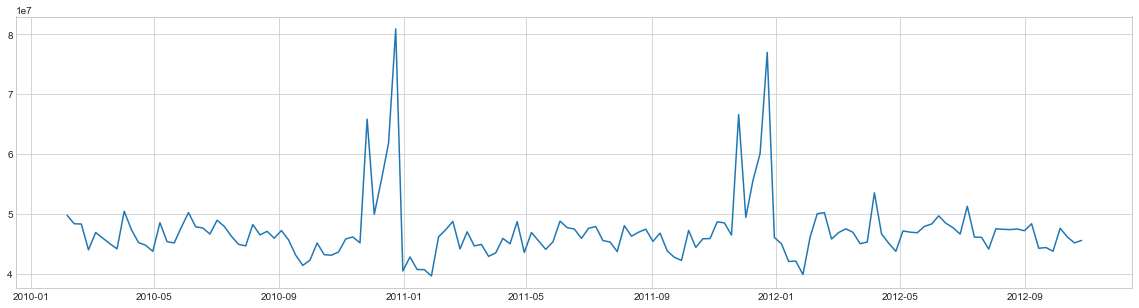

In [87]:
## plot graph
plt.figure(figsize=(20,5))
plt.plot(train_df_new2_weekly.Date,train_df_new2_weekly.Weekly_Sales)
plt.show


In [88]:
## This is a level 1 heading

#### Weekly Sales have drastically risen in yr 2010 Dec- 2011 Jan start followed by Dec 2011-2012 Jan start.As can be inferred it being holiday season So there is sharp increase in Sales

In [89]:
## Create dummy variables for each monnth

In [90]:
train_df_new2["month"] = train_df_new2['Date'].dt.month
train_df_new3 = train_df_new2.drop(["Date"], axis=1)
train_df_new3 = pd.get_dummies(train_df_new3, columns=["month"])#, prefix='month')
#df_all_train = df_all_train.drop('Date', 1)


In [91]:
train_df_new3.head(3)

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1,1,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
## test

test_df_new["month"] = test_df_new['Date'].dt.month
test_df_new1 = test_df_new.drop(["Date"], axis=1)
test_df_new1 = pd.get_dummies(test_df_new1, columns=["month"])#, prefix='month')
#df_all_test = df_all_test.drop('Date', 1)

In [93]:
test_df_new1.head(3)

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Unemployment,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_11,month_12
0,1,1,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,...,6.573,0,0,0,0,0,0,0,1,0
1,1,1,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,...,6.573,0,0,0,0,0,0,0,1,0
2,1,1,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,...,6.573,0,0,0,0,0,0,0,1,0


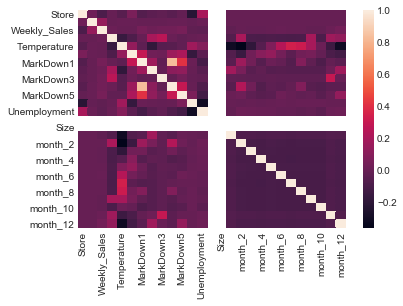

In [94]:
import seaborn as sns
# Correlation between all features
sns.heatmap(train_df_new3.corr())

In [95]:
## Create Train & Test Data.

In [96]:
#train_df_new2["month"] = train_df_new2['Date'].dt.month
train_df_new4 = train_df_new2.drop(["Date"], axis=1)
train_df_new4 = pd.get_dummies(train_df_new4, columns=["month"])#, prefix='month')
#df_all_train = df_all_train.drop('Date', 1)

In [97]:
train_df_new4.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1,1,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0


In [98]:
## Creating X_train,y_train

In [99]:
X=train_df_new4.drop(["Weekly_Sales"],axis=1)

In [100]:
y=train_df_new4["Weekly_Sales"]

In [101]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=7)

In [102]:
X_train.head(3)

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
8333,1,81,0,57.25,3.555,9349.61,7556.01,3.2,1219.92,8143.59,...,0,0,0,0,0,0,0,0,0,0
189118,20,13,0,59.01,4.062,0.00,0.00,0.0,0.00,0.00,...,0,0,1,0,0,0,0,0,0,0
294651,31,7,0,65.16,3.353,0.00,0.00,0.0,0.00,0.00,...,0,0,0,0,0,0,0,1,0,0


In [103]:
X_test.head(3)

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
347476,37,7,0,77.17,3.749,276.27,0.00,14.90,0.00,671.64,...,0,0,1,0,0,0,0,0,0,0
141283,15,24,0,21.84,3.391,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
211171,22,30,0,58.81,4.046,7200.16,6519.27,14.55,54.25,3897.67,...,0,1,0,0,0,0,0,0,0,0


In [104]:
## Capture the error thru 3 mides and decide on the best Model

In [105]:
##The initial benchmarking will be made by looking at three different metrics used for estimating errors, as well as one statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. These are:
##Error Metrics:

##Mean Absolute Error (MAE)
##Mean Sqared Error (MSE)
##Root Mean Squared Error (RMSE)

# Modeling

In [106]:
reg=LinearRegression()
reg.fit(X_train,y_train)
y_predict=reg.predict(X_test)

In [107]:
# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, y_predict)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_predict)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_predict))) #RMSE

# rSquared
score = r2_score(y_test, y_predict)
print("R^2:", score)

MAE:  15053.969697893912
MSE:  491308301.82040715
RMSE:  22165.475447650726
R^2: 0.04006281429836778


In [108]:
## b.KNN Regressor

In [109]:
 #knn = KNeighborsRegressor(n_neighbors=5)
#knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)

In [110]:
# Print out the MAE, MSE & RMSE
#print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
#print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
#print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

In [111]:
#rSquared
#score = r2_score(y_test, y_pred)
#print("R^2:", score)

In [112]:
## Random Forest

In [113]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [114]:
Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

MAE:  1725.9165649935558
MSE:  19409487.70802711
RMSE:  4405.620014030615
R^2: 0.9620769912958551


In [119]:
## f.Decision Tree Regressor

In [120]:

decTr=DecisionTreeRegressor()
decTr.fit(X_train,y_train)
y.pred=decTr.predict(X_test)
#Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

MAE:  1725.9165649935558
MSE:  19409487.70802711
RMSE:  4405.620014030615
R^2: 0.9620769912958551


In [121]:
## g.Extra Trees Regressor

In [122]:
etr_random_best = ExtraTreesRegressor(bootstrap=False, criterion="mse", max_depth=None,
                                      max_features="auto", max_leaf_nodes=None,
                                      min_impurity_decrease=0.0, min_impurity_split=None,
                                      min_samples_leaf=2, min_samples_split=5,
                                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=30,
                                      oob_score=False, random_state=None, warm_start=False)
etr_random_best.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=2,
                    min_samples_split=5, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=30, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [123]:
y_pred = etr_random_best.predict(X_test)

In [124]:
# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

MAE:  1761.422258568716
MSE:  18788044.458397333
RMSE:  4334.517788450906
R^2: 0.9632911911819806


In [125]:
## h.XGBoost

In [126]:
xg=XGBRegressor()

In [127]:
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

In [128]:
# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

MAE:  3819.558641900749
MSE:  41184085.802466735
RMSE:  6417.482824477735
R^2: 0.9195329383313254


In [129]:
#i.# Ridge

In [130]:
rid = Ridge()
rid.fit(X_train, y_train)
y_pred = rid.predict(X_test)

In [131]:
# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

MAE:  15053.969073959614
MSE:  491308294.18236375
RMSE:  22165.475275354773
R^2: 0.040062829221872764


In [132]:
#j. Lasso

In [133]:
las = Lasso()
las.fit(X_train, y_train)
y_pred = las.predict(X_test)

In [134]:
# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

MAE:  15053.787456766071
MSE:  491306273.70836097
RMSE:  22165.42969825672
R^2: 0.040066776902221046


In [135]:
## Holt Winters

In [136]:
 train_df_new1.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,NaN,NaN
1,1,1,2010-02-12,46039.49,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,NaN,NaN
2,1,1,2010-02-19,41595.55,0,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,NaN,NaN


In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import plotly
#import plotly.graph_objs as go
#plotly.offline.init_notebook_mode(connected=True)
import statsmodels.api
import statsmodels.api as smt
import os

In [137]:
df_holtwinter=train_df_new1[['Date','Weekly_Sales']]

In [138]:
df_holtwinter.head(3)

,Date,Weekly_Sales
0,2010-02-05,24924.50
1,2010-02-12,46039.49
2,2010-02-19,41595.55


In [139]:
df_holtwinter.dtypes

Date            datetime64[ns]
Weekly_Sales           float64
dtype: object

In [145]:
df_holtwinter.index=pd.to_datetime(df_holtwinter['Date'],format="%Y-%m")
df_holtwinter.drop('Date',axis=1,inplace=True)

C:\Users\SUNITA\Anoconda-Py\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [146]:
df_holtwinter.head()

,Weekly_Sales
Date,
2010-02-05,24924.50
2010-02-12,46039.49
2010-02-19,41595.55
2010-02-26,19403.54
2010-03-05,21827.90


In [147]:
df_holtwinter.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=421570, freq=None)

In [148]:
ts=df_holtwinter['Weekly_Sales']

In [149]:

ts.head()

Date
2010-02-05    24924.50
2010-02-12    46039.49
2010-02-19    41595.55
2010-02-26    19403.54
2010-03-05    21827.90
Name: Weekly_Sales, dtype: float64

In [152]:
ts['2010']

Date
2010-02-05    24924.50
2010-02-12    46039.49
2010-02-19    41595.55
2010-02-26    19403.54
2010-03-05    21827.90
                ...   
2010-12-03      349.38
2010-12-10      665.96
2010-12-17      222.48
2010-12-24      222.48
2010-12-31       74.55
Name: Weekly_Sales, Length: 140679, dtype: float64

Text(0.5, 0, 'Year')

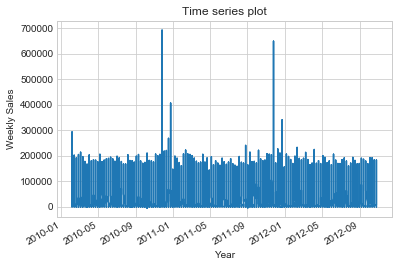

In [153]:
#Plot the time series
ts.plot()
plt.title("Time series plot")
plt.ylabel('Weekly Sales')
plt.xlabel('Year')

In [ ]:
## Sales plot

In [155]:
df_WeeklySales=train_df_new1[['Weekly_Sales']]

In [156]:
df_WeeklySales.head()

,Weekly_Sales
0,24924.50
1,46039.49
2,41595.55
3,19403.54
4,21827.90


Text(0.5, 1.0, 'Sales data')

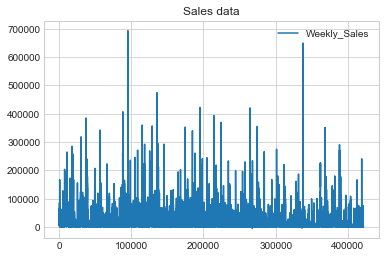

In [157]:
#Plot time series
df_WeeklySales.plot()
plt.title("Sales data")

C:\Users\SUNITA\Anoconda-Py\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


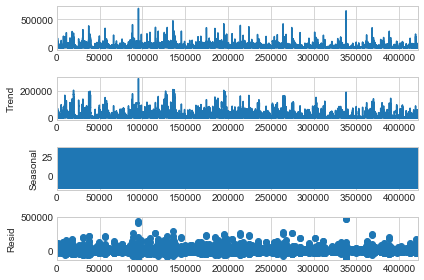

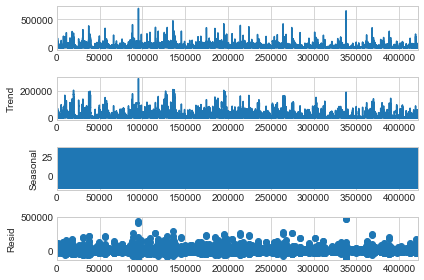

In [159]:
#Decompose the time series
from statsmodels.tsa.api import seasonal_decompose
decomp=smt.tsa.seasonal_decompose(df_WeeklySales,freq=7,model='additive')
decomp.plot()